In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [14]:
data = pd.read_csv(f'C:\\Users\\Leonardo\\Desktop\\Projetos Python\\Pesquisa\\data\\Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['Species'] = data['Species'].replace(to_replace='Iris-setosa', value= 0)
data['Species'] = data['Species'].replace(to_replace='Iris-virginica', value= 1)
data['Species'] = data['Species'].replace(to_replace='Iris-versicolor', value= 2)


In [5]:
data = data.drop('Id', axis = 1 )
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


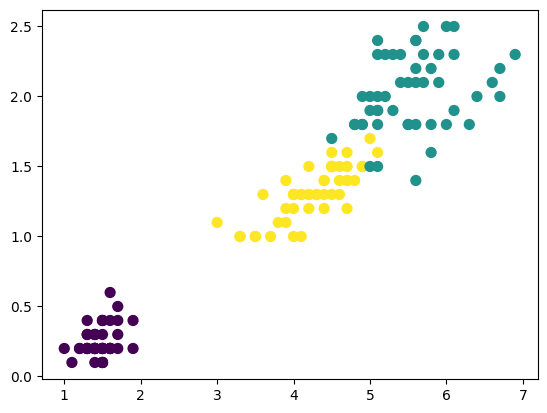

In [6]:
x1 = data['PetalLengthCm']
x2 = data['PetalWidthCm']
plt.scatter(x1, x2, s = 50, c = data['Species'])

In [7]:
valor = LabelEncoder()
valor_hot = ColumnTransformer(transformers=[('encode', OneHotEncoder(), [4])], remainder='passthrough')
new_data = valor_hot.fit_transform(data)
new_data = pd.DataFrame(new_data)
#Defining its columns
new_data.columns =['Iris_Setosa', 
    'Iris_virginica', 
    'Iris_versicolor',
    'SepalLengthCm',
    'SepalWidthCm',
    'PetalLengthCm',
    'PetalWidthCm'    
    ]

new_data

,Iris_Setosa,Iris_virginica,Iris_versicolor,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1.0,0.0,0.0,5.1,3.5,1.4,0.2
1,1.0,0.0,0.0,4.9,3.0,1.4,0.2
2,1.0,0.0,0.0,4.7,3.2,1.3,0.2
3,1.0,0.0,0.0,4.6,3.1,1.5,0.2
4,1.0,0.0,0.0,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...,...
145,0.0,1.0,0.0,6.7,3.0,5.2,2.3
146,0.0,1.0,0.0,6.3,2.5,5.0,1.9
147,0.0,1.0,0.0,6.5,3.0,5.2,2.0
148,0.0,1.0,0.0,6.2,3.4,5.4,2.3


In [8]:
x= data.drop('Species', axis = 1).values
y = pd.DataFrame().assign(Iris_Setosa=new_data['Iris_Setosa'], Iris_virginica = new_data['Iris_virginica'], Iris_versicolor = new_data['Iris_versicolor']).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
y_test

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [9]:
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(150, activation = 'relu', input_shape=(4,)), 
                            tf.keras.layers.Dense(100, activation = 'relu'),           
                            tf.keras.layers.Dense(3, activation = 'softmax')
                             ])


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               750       
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 16,153
Trainable params: 16,153
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(x_train, y_train, epochs=10, batch_size=5)

Epoch 1/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9583
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0710 - accuracy: 0.9583
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9750
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0782 - accuracy: 0.9583
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9750
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0658 - accuracy: 0.9750
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9750
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.9583
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9667
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0787 - accuracy: 0.9750


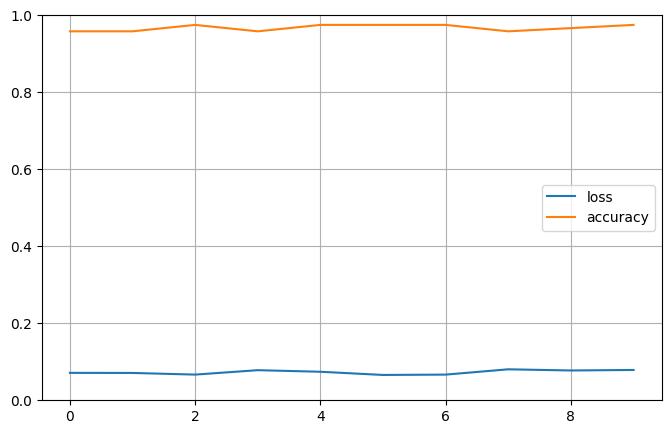

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [46]:
x_new = x_test[:10]
y_pred = model.predict(x_new)
print(y_pred)
print(y_test[:10])

1/1 [==============================] - 0s 28ms/step
[[9.11633979e-05 5.49198175e-03 9.94416833e-01]
 [9.99989390e-01 8.65496303e-12 1.06146053e-05]
 [3.30779487e-10 9.99610603e-01 3.89455556e-04]
 [1.20434044e-04 1.13960197e-02 9.88483489e-01]
 [4.65762932e-05 2.26652739e-03 9.97686863e-01]
 [9.99970436e-01 6.69179365e-11 2.95686241e-05]
 [7.91020866e-04 8.03151634e-05 9.99128640e-01]
 [4.80987273e-06 7.98784494e-01 2.01210588e-01]
 [5.92668403e-05 2.35382184e-01 7.64558554e-01]
 [3.93169845e-04 2.53592298e-04 9.99353230e-01]]
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
